Plots a histogram to visually communicate temperature anomaly of a day's SST

In [55]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

In [56]:
def suffix(day):
    updated_day = day
    if updated_day == 1:
        suffix = 'st'
    elif updated_day == 2:
        suffix = 'nd'
    elif updated_day == 3:
        suffix = 'rd'
    elif (4 <= updated_day <= 20):
        suffix = 'th'
    elif updated_day == 21:
        suffix = 'st'
    elif updated_day == 22:
        suffix = 'nd'
    elif updated_day == 23:
        suffix = 'rd'
    elif (24 <= updated_day <= 30):
        suffix = 'th'
    elif updated_day == 31:
        suffix = 'st'
    return suffix

In [57]:
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [58]:
def trivia_msg(climatology, today_sst, day, month):
    trivia_msg = None
    if today_sst > climatology.SURF_TEMP_C.mean():
        trivia_msg = 'Today is warmer than the average \n of all ' + months[month] +str(round(day,0)) + suffix(day) + 's, but not by much.' #TODO implement  std gate
    elif today_sst < climatology.SURF_TEMP_C.mean():
        trivia_msg = 'Today is cooler than the average \n of all ' + months[month] +str(round(day,0)) + suffix(day) + 's, but not by much.'
    if today_sst > np.nanpercentile(climatology.SURF_TEMP_C.values,90): #How do you define a MHW day? Also np.percentile assumes a normal distribution I think
        trivia_msg = 'Today is among the hottest 10% \nof ' + months[month] +str(round(day,0)) + suffix(day) + 's on record.'
    if today_sst < np.nanpercentile(climatology.SURF_TEMP_C.values,10): #How do you define a MHW day? Also np.percentile assumes a normal distribution I think
        trivia_msg = 'Today is among the coldest 10% \nof ' + months[month] +str(round(day,0)) + suffix(day) + 's on record.'
    if today_sst >= climatology.SURF_TEMP_C.max():
        trivia_msg = 'Today is the hottest \n' + months[month] +str(round(day,0)) + suffix(day) + ' on record.'
    elif today_sst <= climatology.SURF_TEMP_C.min():
        trivia_msg = 'Today is the coldest \n' + months[month] +str(round(day,0)) + suffix(day) + ' on record.'
    return trivia_msg

In [59]:
def sst_hist(sst_filename, location):
    all_sst = pd.read_csv(sst_filename, usecols = ['SURF_TEMP_C','MONTH','DAY','YEAR'])
    last = all_sst.iloc[-1,:]
    day = last.DAY
    month = last.MONTH
    today_sst = last.SURF_TEMP_C
    today_suffix = suffix(day)
    climatology = all_sst[(all_sst['MONTH'] == month) & (all_sst['DAY'] == day)]
    max_day = all_sst.loc[climatology.SURF_TEMP_C.idxmax()]
    min_day = all_sst.loc[climatology.SURF_TEMP_C.idxmin()]
    mean = climatology.SURF_TEMP_C.mean()
    max_msg = 'Record High SST: '  + str(max_day.SURF_TEMP_C) + 'ºC in ' + str(int(max_day.YEAR))
    min_msg = 'Record Low SST: '  + str(min_day.SURF_TEMP_C) + 'ºC in ' + str(int(min_day.YEAR))
    mean_msg = 'Average SST: ' + str(round(mean,1)) + 'ºC'
    
            

    cm = plt.colormaps.get_cmap('RdBu_r')
    n, bins, patches = plt.hist(climatology.SURF_TEMP_C, bins = 20)
    plt.axvline(today_sst, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(mean, color='k', linestyle='dotted', linewidth=1, c= '#404040')
    ylim = plt.gca().get_ylim()
    top = ylim[1]
    bottom = ylim[0]
    xlim = plt.gca().get_xlim()
    left = xlim[0]
    right = xlim[1]
    y_range = top - bottom
    temp_label_x = today_sst + 0.2 if today_sst > mean else today_sst - 0.3
    plt.text(temp_label_x, top - y_range * 0.4, "Today's Temperature", rotation =90)
    plt.text(mean - 0.3, bottom + 0.4, "Average SST", c='#404040', rotation =90)
    plt.xlabel('Temperature (ºC)')
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.ylabel('Frequency')
    plt.text(right + 0.1, top - 1, max_msg, fontsize=10, color='#67001F')
    plt.text(right + 0.1, top - 2, min_msg, fontsize=10, color='#053061')
    plt.text(right + 0.1, top - 3, mean_msg, fontsize=10, c='k')
    plt.text(right + 0.1, bottom, trivia_msg(climatology, today_sst, day, month), fontsize=10, color='#252385')

    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
        
    fig_filename = 'sst_hist'+str(day)+str(month)+location.replace(' ', '_')+".png"
    plt.savefig(fig_filename)
    plt.show()

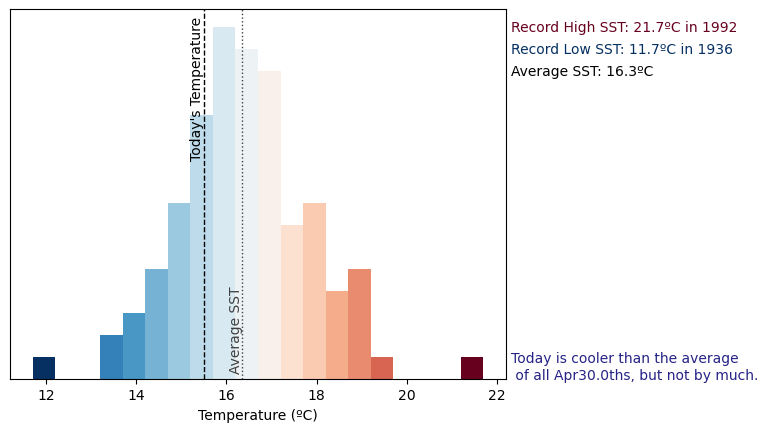

In [60]:
sst_filename='SIO_TEMP_20230105.csv'
location = 'SIO Pier'

sst_hist(sst_filename, location)